In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

세상에서 가장 흥미 있는 숫자는 어떤 것일까? 아마도 여러분 가운데는 원주율, 자연대수, 또는 17을 좋아하는 사람들이 있을 것이다. 어떤 사람은 phi, 즉 황금률을 선택할 수도 있다. 아래 계산식은 황금률을 계산하는 것이다.

In [2]:
phi = (1 + 5 ** 0.5) * 0.5
print('%g' % phi)

1.61803


더 많은 자릿수를 표시해 보자

In [4]:
print('%17.16g' % phi)

1.618033988749895


바로 위에서는 phi 를 새로 계산한 것이 아니고, 유효숫자를 16자리로 표시한 것이다.
황금률은 수학에서 자주 나타난다. 여기서도 자주 나타날 것이다.  황금률은 황금 직사각형에서 유래하였는데, 그림 1.1 에 표시되어 있다. 황금 직사각형에서 정사각형 부분을 제거하면 닮은꼴인 직사각형이 남는다.

(-0.080901699437494756, 1.6989356881873896, -0.050000000000000003, 1.05)

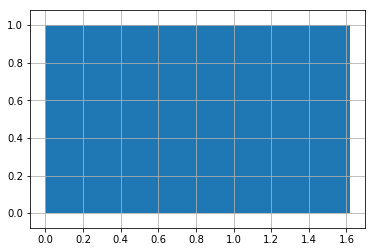

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

ax = plt.gca()
ax.cla()

phi = (1 + 5 ** 0.5) * 0.5

# add a rectangle
rect = patches.Rectangle((0.0, 0.0), phi, 1.0,)
ax.add_patch(rect)
plt.axis('equal')
plt.grid(True)
plt.show()